In [ ]:
#Preprocessing of dataset

import pandas as pd

Loading the dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Checking for missing values
print(data.isnull().sum())

#Dropping rows with missing values
data = data.dropna()

#Filling missing values (e.g., fill with mean for numerical columns)
data['tenure'].fillna(data['tenure'].mean(), inplace=True)
data['MonthlyCharges'].fillna(data['MonthlyCharges'].mean(), inplace=True)

#Filling missing categorical data with the mode
data['Contract'].fillna(data['Contract'].mode()[0], inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-2-4f0be6750240>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['tenure'].fillna(data['tenure'].mean(), inplace=True)
<ipython-input-2-4f0be6750240>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Labelling Encoding (suitable for binary or ordinal categories)
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])  # e.g., Male=1, Female=0

#One-Hot Encoding (for non-ordinal categories like 'contract_type')
data = pd.get_dummies(data, columns=['Contract', 'PaymentMethod'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing which columns to scale
num_features = ['tenure', 'MonthlyCharges']

# Initializing scaler
scaler = StandardScaler()  # or use MinMaxScaler()

# Fit and transform the data
data[num_features] = scaler.fit_transform(data[num_features])


In [ ]:
# Save to a new CSV file
data.to_csv('processed_data.csv', index=False)


In [ ]:
#Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the preprocessed dataset
data = pd.read_csv('processed_data.csv')

# Display the first few rows of the dataset
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents    tenure  \
0  7590-VHVEG       0              0     Yes         No -1.277445   
1  5575-GNVDE       1              0      No         No  0.066327   
2  3668-QPYBK       1              0      No         No -1.236724   
3  7795-CFOCW       1              0      No         No  0.514251   
4  9237-HQITU       0              0      No         No -1.236724   

  PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           No  No phone service             DSL             No  ...   
1          Yes                No             DSL            Yes  ...   
2          Yes                No             DSL            Yes  ...   
3           No  No phone service             DSL            Yes  ...   
4          Yes                No     Fiber optic             No  ...   

  StreamingMovies PaperlessBilling MonthlyCharges TotalCharges Churn  \
0              No              Yes      -1.160323        29.85    No   
1       

In [ ]:
# Defining features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Save the training and testing datasets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


ValueError: could not convert string to float: '4223-BKEOR'

In [ ]:
# Check the data types of the features
print(X_train.dtypes)


customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                   object
Dependents                                object
tenure                                   float64
PhoneService                              object
MultipleLines                             object
InternetService                           object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                              object
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit

In [ ]:
#Further preprocessing and save the final preprocessed file as preprocessed_data.scv

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Loading the preprocessed dataset
data = pd.read_csv('processed_data.csv')

#Converting 'TotalCharges' to numeric and handle NaN values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

#Identifying categorical and numerical columns
categorical_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'PaperlessBilling']

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical variables
    ])

#Applying transformations to the data
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']                # Target variable

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

#Converting preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed)

#saving the preprocessed data to a new CSV file
preprocessed_data = pd.concat([X_preprocessed, y.reset_index(drop=True)], axis=1)
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

print("Preprocessing completed and saved to 'preprocessed_data.csv'.")


## **Supervised** **Learning** **Algorithms**
  **Random** **Forest** **Algorithm**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Loading the preprocessed data
data = pd.read_csv('preprocessed_data.csv')

#Defining features and target variable
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']                # Target variable

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Making predictions on the test set
y_pred = rf_model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7835344215755855
Confusion Matrix:
 [[934 102]
 [203 170]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.90      0.86      1036
         Yes       0.62      0.46      0.53       373

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



# **Supervised** **Learning** **Algorithm** **2**
 Logistic Regression

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#Loading the preprocessed data
data = pd.read_csv('preprocessed_data.csv')

#Defining features and target variable
X = data.drop('Churn', axis=1)  # Features
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert target variable to binary

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)        # Transform the test data

#Training the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed
logistic_model.fit(X_train, y_train)

#Making predictions on the test set
y_pred = logistic_model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Printing results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8168914123491838
Confusion Matrix:
 [[942  94]
 [164 209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# **Unsupervised Learning Algorithm 1**
K-means

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
data = pd.read_csv('processed_data.csv')

# Select numerical features for clustering
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Adjust based on your dataset
X = data[num_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., k=3 based on the Elbow plot)
optimal_k = 3  # Replace with your chosen value based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend(title='Cluster')
plt.show()

# Optional: Save the clustered data to a new CSV
data.to_csv('clustered_data.csv', index=False)

print("K-Means clustering completed. Clustered data saved to 'clustered_data.csv'.")


ValueError: could not convert string to float: ' '

In [ ]:
print(data.columns)


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'Churn'],
      dtype='object')


In [ ]:
# Check for non-numeric values in the selected features
print(data[num_features].info())
print(data[num_features].isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   float64
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   object 
dtypes: float64(2), object(1)
memory usage: 165.2+ KB
None
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


In [ ]:
# Convert columns to numeric, forcing errors to NaN
data[num_features] = data[num_features].apply(pd.to_numeric, errors='coerce')

# Option 1: Drop rows with any NaN values in selected features
data = data.dropna(subset=num_features)

# Option 2: Fill NaN values with the mean of each column (uncomment to use)
# data[num_features] = data[num_features].fillna(data[num_features].mean())


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
X = data[num_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters
kmeans.fit(X_scaled)

# Get cluster labels
data['Cluster'] = kmeans.labels_

# Check the resulting DataFrame with cluster assignments
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents    tenure  \
0  7590-VHVEG       0              0     Yes         No -1.277445   
1  5575-GNVDE       1              0      No         No  0.066327   
2  3668-QPYBK       1              0      No         No -1.236724   
3  7795-CFOCW       1              0      No         No  0.514251   
4  9237-HQITU       0              0      No         No -1.236724   

  PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           No  No phone service             DSL             No  ...   
1          Yes                No             DSL            Yes  ...   
2          Yes                No             DSL            Yes  ...   
3           No  No phone service             DSL            Yes  ...   
4          Yes                No     Fiber optic             No  ...   

  PaperlessBilling MonthlyCharges TotalCharges Churn Contract_One year  \
0              Yes      -1.160323        29.85    No             False   
1   

In [ ]:
# Save the DataFrame to a CSV file
data.to_csv('clustered_data.csv', index=False)


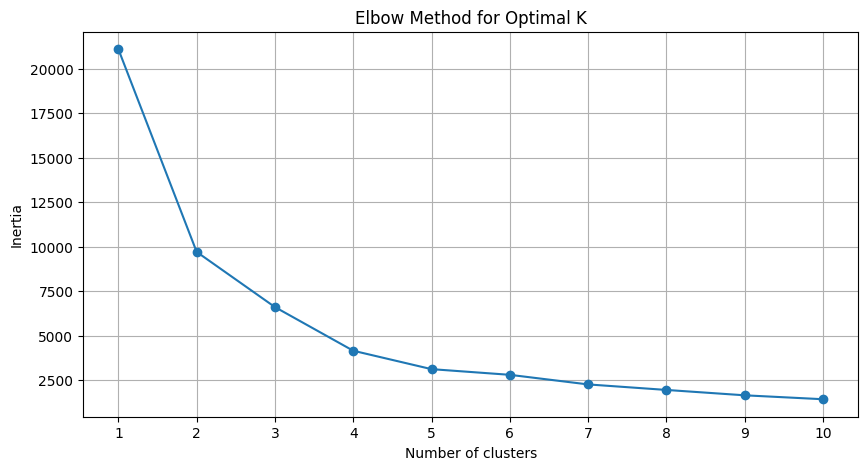

Data saved to 'clustered_data1.csv'


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('clustered_data.csv')

# Select numerical features for clustering
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Adjust based on your dataset
data[num_features] = data[num_features].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values in selected features
data = data.dropna(subset=num_features)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[num_features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)  # Test from 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()

# Fit the K-Means model with the optimal number of clusters
optimal_k = 3  # Choose the number of clusters from the Elbow Method graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels and add them to the original DataFrame
data['Cluster'] = kmeans.labels_

# Save the clustered data to a CSV file
data.to_csv('clustered_data1.csv', index=False)

print("Data saved to 'clustered_data1.csv'")


In [ ]:
#Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster')[num_features].mean()
print("Cluster Characteristics:")
print(cluster_summary)


Cluster Characteristics:
           tenure  MonthlyCharges  TotalCharges
Cluster                                        
0        1.008374        0.890962   5223.116817
1       -0.878723       -0.072523    752.216109
2        0.490251       -1.170826   1339.258906


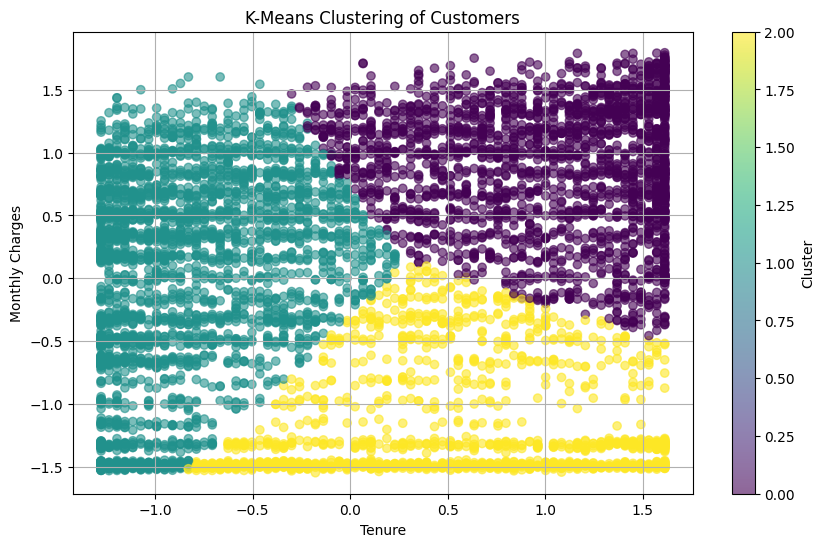

In [ ]:
#Visualizing the Clusters - Scatter plot
import matplotlib.pyplot as plt

# Visualize the clusters in a 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['tenure'], data['MonthlyCharges'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of Customers')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

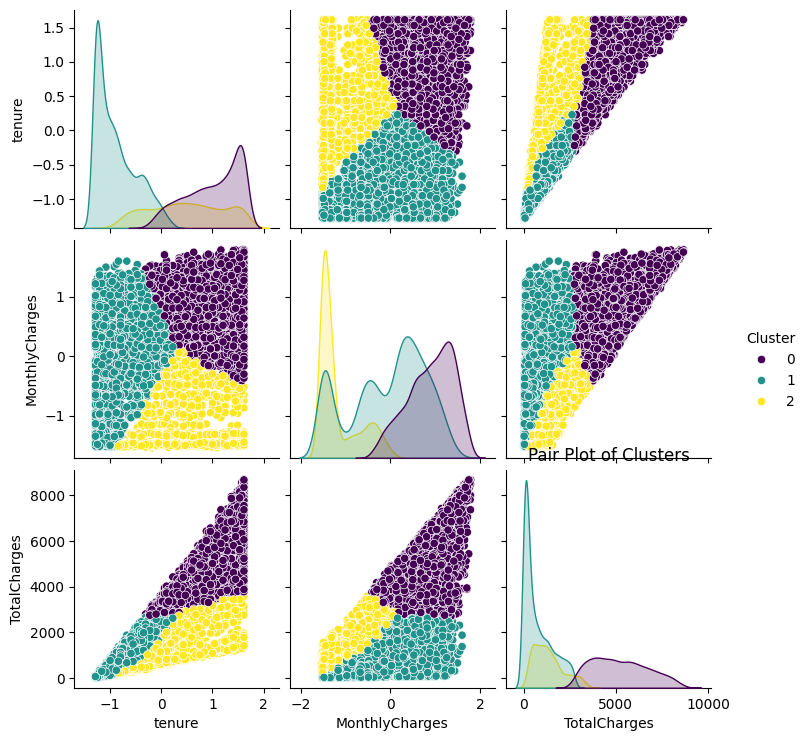

In [ ]:
#Visualizing using Pair Plot
import seaborn as sns

#Visualize clusters using a pair plot
sns.pairplot(data, hue='Cluster', vars=num_features, palette='viridis')
plt.title('Pair Plot of Clusters')
plt.show()

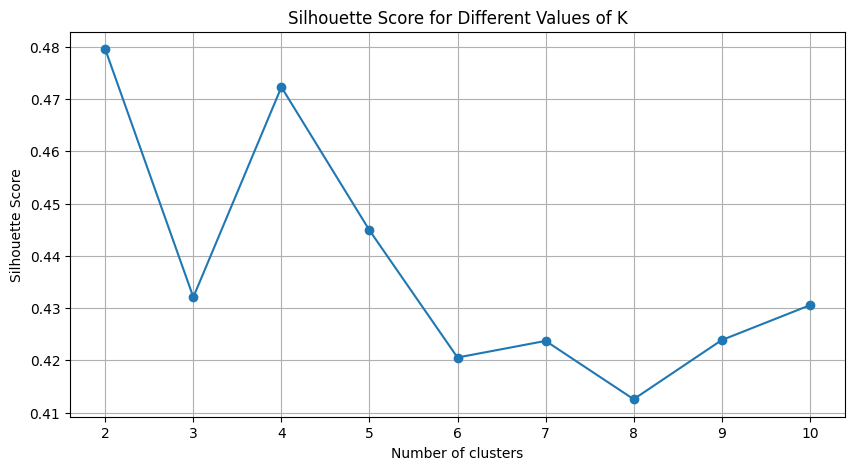

In [ ]:
#Experimenting with Different Values of k
#Code to Calculate Silhouette Score
from sklearn.metrics import silhouette_score

#Calculate Silhouette Scores for different values of k
silhouette_scores = []
K = range(2, 11)  # Starting from 2 since silhouette score is not defined for k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K)
plt.grid()
plt.show()


In [ ]:
# Save the clustered data with the new k value
data.to_csv('clustered_data_k{}.csv'.format(optimal_k), index=False)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load the dataset
data = pd.read_csv('processed_data.csv')

# Define the features for clustering
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = data[num_features]

# Convert empty strings or spaces to NaN
X.replace(' ', pd.NA, inplace=True)

# Drop rows with NaN values or fill with a suitable value
X = X.dropna()  # Alternatively, use X.fillna(X.mean()) to fill NaNs with column mean

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original data
data = data.loc[X.index]  # Match indices after dropping/filling NaN
data['Cluster'] = clusters

print(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Cluster']].head())


     tenure  MonthlyCharges TotalCharges  Cluster
0 -1.277445       -1.160323        29.85        0
1  0.066327       -0.259629       1889.5        0
2 -1.236724       -0.362660       108.15        0
3  0.514251       -0.746535      1840.75        0
4 -1.236724        0.197365       151.65        0


<ipython-input-4-bf7d04c468a6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(' ', pd.NA, inplace=True)


In [ ]:
# Convert columns to numeric, forcing non-numeric values to NaN
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce')
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#Drop rows with NaN values in these columns
data = data.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges'])


#calculating the mean again
cluster_summary = data.groupby('Cluster')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
            tenure  MonthlyCharges  TotalCharges
Cluster                                        
0        0.002062        0.001214   2283.300441


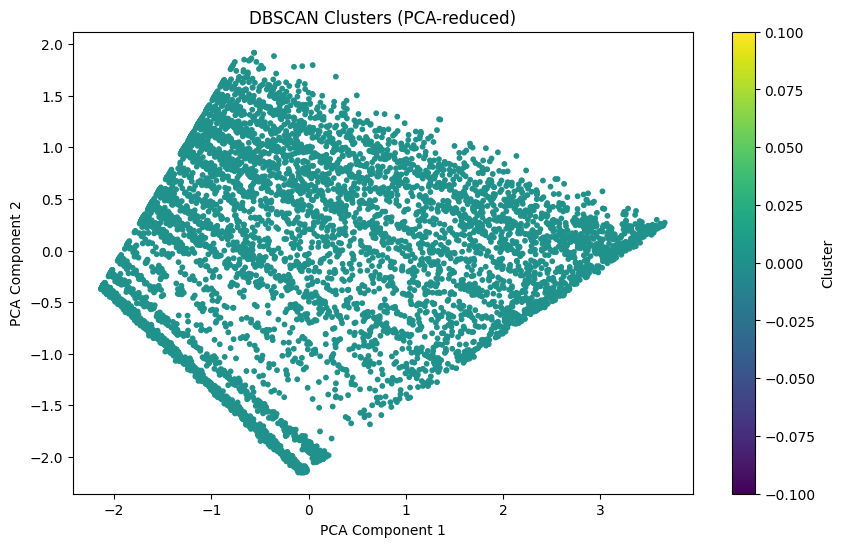

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.colorbar(scatter, label='Cluster')
plt.title("DBSCAN Clusters (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# **Comparison of K-Means and DBSCAN**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Load the cleaned dataset
data = pd.read_csv("processed_data.csv")

# Define the features for clustering
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Replace empty strings or spaces with NaN and fill NaN with column mean
data[num_features] = data[num_features].replace(['', ' '], np.nan)
data[num_features] = data[num_features].astype(float)  # Convert columns to float type
data[num_features] = data[num_features].fillna(data[num_features].mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[num_features])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = kmeans_labels

# DBSCAN Clustering with initial parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

# Check number of clusters for DBSCAN (excluding noise points)
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"K-Means formed {kmeans.n_clusters} clusters.")
print(f"DBSCAN formed {dbscan_clusters} clusters (excluding noise).")

# Calculate Silhouette Scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Only calculate silhouette score for DBSCAN if it has more than one cluster
if dbscan_clusters > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN did not form enough clusters for silhouette score calculation.")

# Save the results to a CSV for further analysis
data.to_csv("New_clustered_data.csv", index=False)

print("Clustering completed and results saved to New_Clustered_data.csv.")



K-Means formed 3 clusters.
DBSCAN formed 2 clusters (excluding noise).
K-Means Silhouette Score: 0.45088440853509726
DBSCAN Silhouette Score: -0.17520078892924765
Clustering completed and results saved to New_Clustered_data.csv.


# **Reinforcement** **Learning**

In [ ]:
import numpy as np
import pandas as pd
import random

# Loading dataset
data = pd.read_csv("processed_data.csv")  # Adjust to your dataset

# Define parameters
num_states = 10  # Example: define based on your state representation
num_actions = 4  # Example: define based on possible actions
q_table = np.zeros((num_states, num_actions))  # Initialize Q-Table

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.995
min_exploration_rate = 0.01
num_episodes = 1000

def get_reward(state, action):
    # Define a reward function based on your domain knowledge
    return random.choice([-1, 0, 1])  # Placeholder for actual reward logic

def get_next_state(state, action):
    # Define how the environment transitions from one state to another
    return (state + 1) % num_states  # Placeholder for actual transition logic

# Training the agent
for episode in range(num_episodes):
    state = random.randint(0, num_states - 1)  # Random initial state
    done = False

    while not done:
        # Exploration vs Exploitation
        if random.uniform(0, 1) < exploration_rate:
            action = random.randint(0, num_actions - 1)  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        next_state = get_next_state(state, action)
        reward = get_reward(state, action)

        # Update Q-Table
        q_table[state, action] = q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action]
        )

        state = next_state

        if state == num_states - 1:  # Define a condition to end the episode
            done = True

    # Decay exploration rate
    if exploration_rate > min_exploration_rate:
        exploration_rate *= exploration_decay

# Testing the agent
test_state = 0  # Start from the initial state
test_results = []

for _ in range(10):  # Run a test for 10 steps
    action = np.argmax(q_table[test_state])  # Choose the best action
    reward = get_reward(test_state, action)  # Get reward
    test_results.append(reward)  # Store result
    test_state = get_next_state(test_state, action)  # Move to the next state

print("Test Results:", test_results)


Test Results: [0, 0, 0, 0, 1, 0, -1, 0, 1, -1]
